In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras import datasets

## **Load the Dataset**

In [9]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)

In [14]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

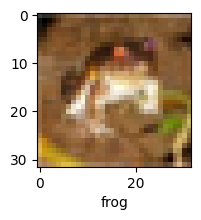

In [17]:
plot_sample(X_train, y_train, 0)

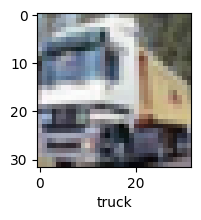

In [18]:

plot_sample(X_train, y_train, 1)

## **Normalizing the training data**

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## **Build simple artificial neural network for image classification**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [24]:
model = Sequential()

In [25]:
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(3000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.5098 - loss: 1.3910
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step - accuracy: 0.5239 - loss: 1.3522
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 93ms/step - accuracy: 0.5358 - loss: 1.3255
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.5482 - loss: 1.2892
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 85ms/step - accuracy: 0.5568 - loss: 1.2547
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 85ms/step - accuracy: 0.5705 - loss: 1.2238
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.5873 - loss: 1.1886
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 83ms/step - accuracy: 0.5959 - loss: 1.1675
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 85ms/step - accuracy: 0.5994 - loss: 1.1449
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.6177 - loss: 1.1066
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 88ms/step - accuracy: 0.6218 - loss: 1.07

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

In [33]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step


In [34]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [35]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.71      0.59      1000
           1       0.63      0.73      0.67      1000
           2       0.26      0.81      0.39      1000
           3       0.45      0.23      0.31      1000
           4       0.59      0.18      0.28      1000
           5       0.53      0.35      0.42      1000
           6       0.59      0.55      0.57      1000
           7       0.81      0.43      0.56      1000
           8       0.85      0.48      0.61      1000
           9       0.68      0.52      0.59      1000

    accuracy                           0.50     10000
   macro avg       0.59      0.50      0.50     10000
weighted avg       0.59      0.50      0.50     10000



## **Now let us build a convolutional neural network to train our images**

In [42]:
print(X_train.shape)

(50000, 32, 32, 3)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [46]:
# Define the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(150, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 73ms/step - accuracy: 0.4165 - loss: 1.6187
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 70ms/step - accuracy: 0.6406 - loss: 1.0372
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 72ms/step - accuracy: 0.7000 - loss: 0.8695
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 71ms/step - accuracy: 0.7403 - loss: 0.7565
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 72ms/step - accuracy: 0.7702 - loss: 0.6550
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 68ms/step - accuracy: 0.8009 - loss: 0.5667
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.8290 - loss: 0.4860
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 71ms/step - accuracy: 0.8550 - loss: 0.4191
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.8791 - loss: 0.3503
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.8988 - loss: 0.2912
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.9119 - loss: 0.24

In [52]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


In [53]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [54]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      1000
           1       0.83      0.75      0.79      1000
           2       0.54      0.59      0.57      1000
           3       0.46      0.53      0.49      1000
           4       0.69      0.54      0.61      1000
           5       0.54      0.61      0.57      1000
           6       0.86      0.67      0.75      1000
           7       0.69      0.69      0.69      1000
           8       0.76      0.83      0.79      1000
           9       0.72      0.77      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [56]:
y_classes = y_pred_classes
y_classes[:5]

[3, 8, 9, 0, 6]

In [57]:

y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

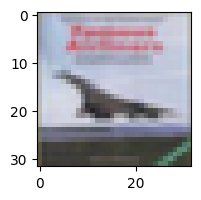

In [58]:
plot_sample(X_test, y_test,3)

In [59]:
classes[y_classes[3]]

'airplane'

In [60]:
classes[y_classes[3]]

'airplane'